# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas
import deltas.plotting.plots as plots

## Get data

In [2]:
N1 = 10000
N2 = 10
data_clf = run.get_data(
    m1=[-2, -2],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )


## Get Classifier

clf


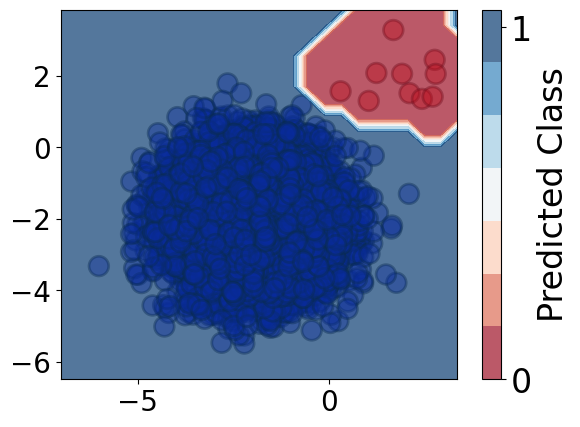

SMOTE


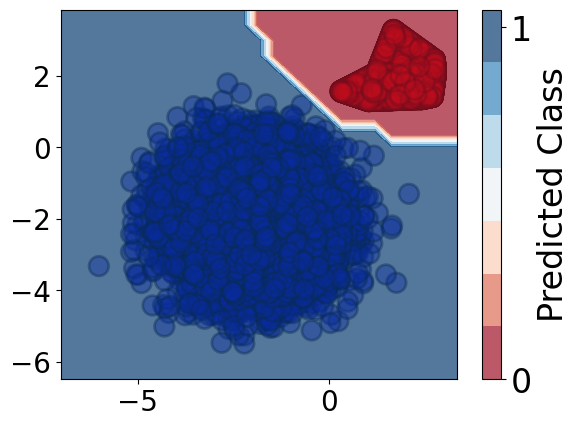

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [4]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.23632373]])

## Fit deltas

deltas init: [1, 0.9996983997135093]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.7397397397397399 
    delta2: 0.999999999970411
    constraint satisfied: False


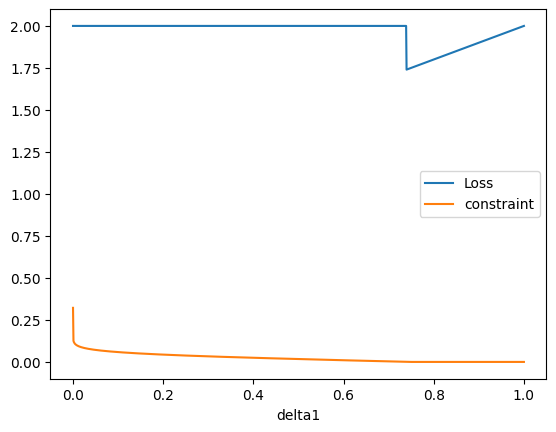

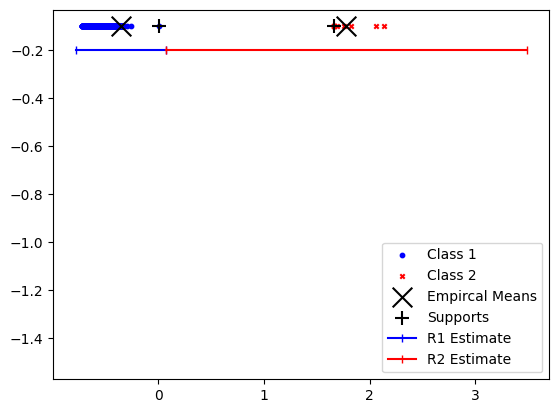

In [5]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

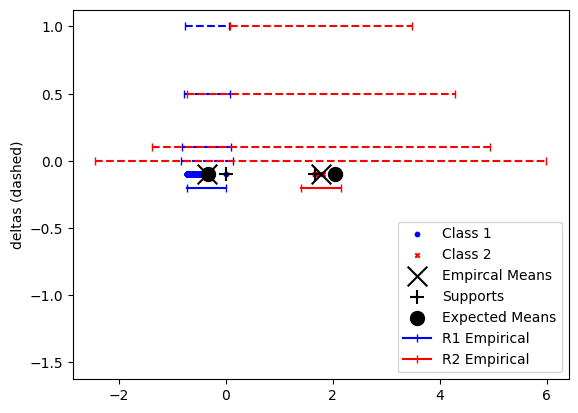

In [6]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## See how classifier's boudnary changes with delta

In [7]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [8]:
deltas_model.print_params()

Parameters
                R:  2.1357972572483783
                N1: 10000
                N2: 10
                R1: 0.367262543896599
                R2: 0.3563328747147625
                M:  1.6586346892924204
                D:  2.133697285804326
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9342
deltas accuracy: 0.9853
SMOTE accuracy: 0.96595

original F1: 0.9295654035538429
deltas F1: 0.9850867403875418
SMOTE F1: 0.9647497282468036

original precision0: 0.8837044892188052
deltas precision0: 0.9718063387128135
SMOTE precision0: 0.9362419249133976

original precision1: 1.0
deltas precision1: 0.9995882231830348
SMOTE precision1: 1.0



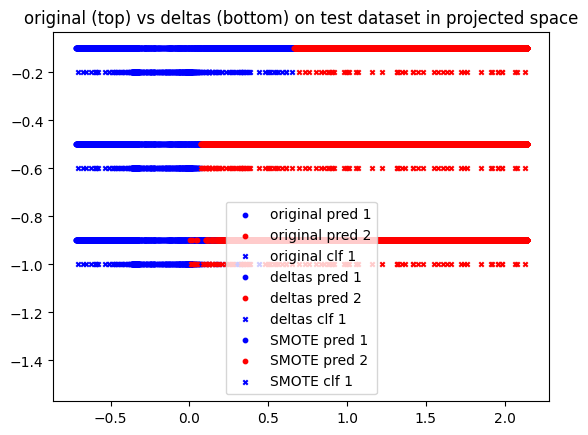

original


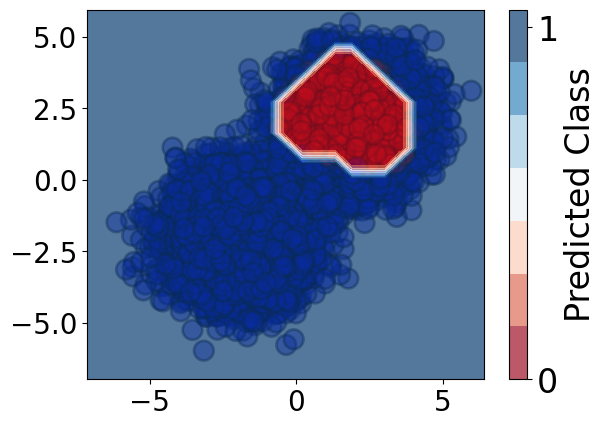

deltas


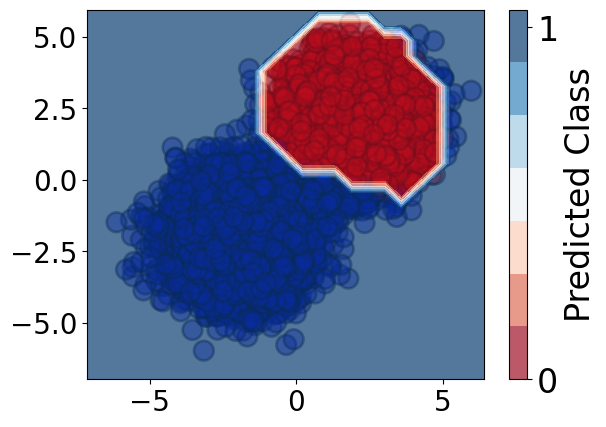

SMOTE


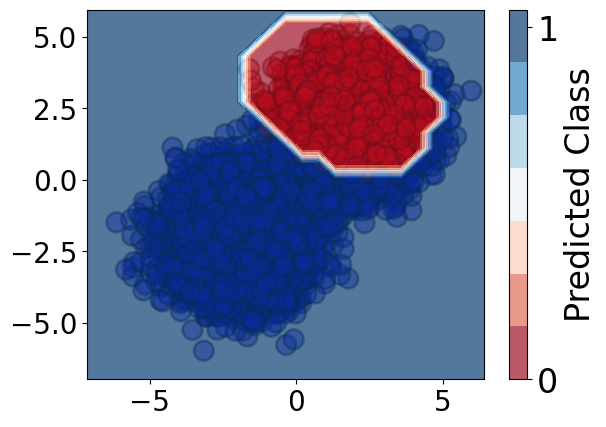

In [9]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)